In [24]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import mglearn
# from preamble import *


In [5]:
bmi = pd.read_csv("221017_bmi_500.csv", index_col = 'Label')
bmi.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


### 1.Encoding : Feature "Gender"를 명목척도로 변환

In [6]:
gender = []
for i in bmi['Gender']:
    if i == "Male":
        gender.append(1)
    else:
        gender.append(0)
        
# Gender에 0과 1로 변환된 리스트를 넣어줌
bmi["Gender"] = gender
bmi.head()

,Gender,Height,Weight
Label,,,
Obesity,1,174,96
Normal,1,189,87
Obesity,0,185,110
Overweight,0,195,104
Overweight,1,149,61


### 2.산점도를 통한 데이터 탐색

In [8]:
bmi = pd.read_csv('221017_bmi_500.csv', index_col='Label')
# 산점도를 표시하는 함수를 만들어보자~!
def myScatter(label, color) :
    # 원하는 레이블값을 인덱싱
    tmp = bmi.loc[label]
    # scatter : 산점도로 표시하는 명령
    plt.scatter(tmp['Weight'],     # x축 데이터 설정
                tmp['Height'],     # y축 데이터 설정
                c = color,         # 색상을 결정하는 명령
                label = label      # label로 설정하는 명령
                )

In [13]:
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

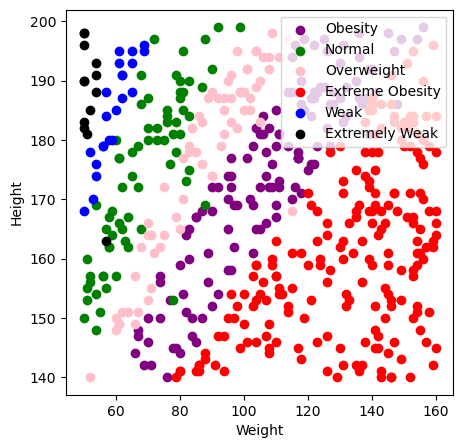

In [14]:
plt.figure(figsize=(5,5))

myScatter("Obesity","purple")
myScatter("Normal","green")
myScatter("Overweight","pink")
myScatter("Extreme Obesity","red")
myScatter("Weak","blue")
myScatter("Extremely Weak","black")

plt.legend(loc = "upper right")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

### 3.알고리즘 만들기

In [18]:
bmi = pd.read_csv("221017_bmi_500.csv")

gender = []
for i in bmi['Gender']:
    if i == "Male":
        gender.append(1)
    else:
        gender.append(0)
        
# Gender에 0과 1로 변환된 리스트를 넣어줌
bmi["Gender"] = gender

#### 3-1. 독립변수와 종속변수 구분하기

In [20]:
X = bmi.loc[:, "Height":"Weight"]
y = bmi.loc[:, "Label"]

print("X : ", X.shape)
print("y : ", y.shape)

X :  (500, 2)
y :  (500,)


#### 3-2.TrainSet과 TestSet 나누기

In [22]:
X_train = X.iloc[:350, :]
y_train = y.iloc[:350]

X_test = X.iloc[350:, :]
y_test = y.iloc[350:]

print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)

print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (350, 2)
y_train :  (350,)
X_test :  (150, 2)
y_test :  (150,)


#### 3-3.Model선언

In [26]:
model = KNeighborsClassifier(n_neighbors= 10)

#### 3-4.모델 학습시키기

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

#### 3-5.모델 테스트

In [30]:
pre = model.predict(X_test)

#### 3-6.모델 평가

In [31]:
metrics.accuracy_score(pre, y_test)

0.94

In [36]:
model.predict([[180, 77]])

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)